In [52]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import time
import pandas as pd
import keras


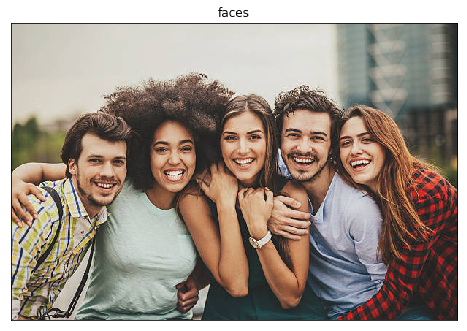

In [53]:
%matplotlib inline
# image load
image_group = cv2.imread("images/2.jpg")

#convert to RGB scale
image_group = cv2.cvtColor(image_group, cv2.COLOR_BGR2RGB)

#size and plot
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])


ax1.set_title('faces')
ax1.imshow(image_group)

Detected faces :  5


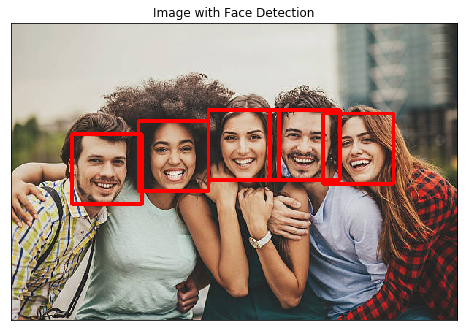

In [54]:
#converting RGB images to grayscale

gray = cv2.cvtColor(image_group, cv2.COLOR_RGB2GRAY)

#Use haarcascade face detector

face_cascade = cv2.CascadeClassifier("cv haarcascade/haarcascade_frontalface_default.xml")


#detect the faces
faces = face_cascade.detectMultiScale(gray, 4, 6)
print ("Detected faces : ", len(faces))

image_with_detection = np.copy(image_group)


#creating bounding box
for (x,y,w,h) in faces:
    # bounding box to the detections image red box
    cv2.rectangle(image_with_detection, (x,y), (x+w,y+h), (255,0,0), 3)
    
# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detection)
    



----------------------------------

# Step 1: ADD Eye Detection

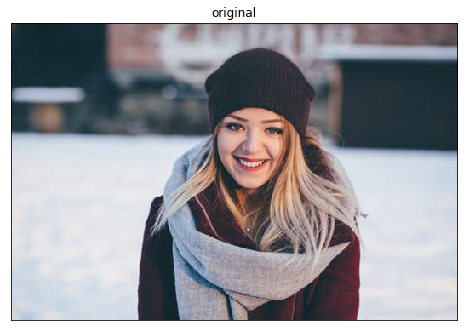

In [55]:
#load image
image = cv2.imread("images/girl.jpeg")


#convert to RGB channel
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image plotting
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('original')
ax1.imshow(image)


In [56]:


# convert RBG to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


#using haarcascade frontface detection
face_casecade = cv2.CascadeClassifier('cv haarcascade/haarcascade_frontalface_default.xml')


#face detection in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)


print ("Faces in image:" , len(faces))


image_with_detection = np.copy(image)


#bounding box for image
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detection, (x,y), (x+w, y+h), (255,0,0),3)
    
#display image
fig = plt.Figure(figsize= (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title("image with detection")
ax1.imshow(image_with_detection)


Faces in image: 1


Number of faces detected: 1
Number of eyes detected: 2


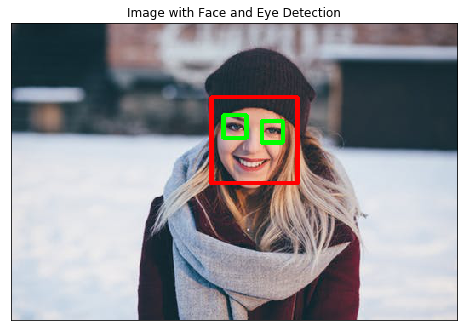

In [57]:
image_with_detection = np.copy(image)   

for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detection,(x,y), (x+w,y+h),(255,0,0), 3)  
    

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))


# adding eye cascade
eye_cascade = cv2.CascadeClassifier("cv haarcascade/haarcascade_eye.xml")

#detect faces in image
eyes = eye_cascade.detectMultiScale(gray, 1.02, 6)


print ("Number of eyes detected:", len(eyes))

for (x,y,w,h) in eyes:
    cv2.rectangle(image_with_detection, (x,y), (x+w,y+h),(0,255,0), 3)

# Plot the image with both faces and eyes detected
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detection)

## Applying Face and Eye cascade on webcam 

In [45]:

#apply cascade on web cam (0)for my laptop , (1)for external 
face_cascade = cv2.CascadeClassifier('cv haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('cv haarcascade/haarcascade_eye.xml')
cap = cv2.VideoCapture(0)#(0 for my inbuit)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
            

    cv2.imshow('Face and Eye detect',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

-------------



# Adding some noise in image

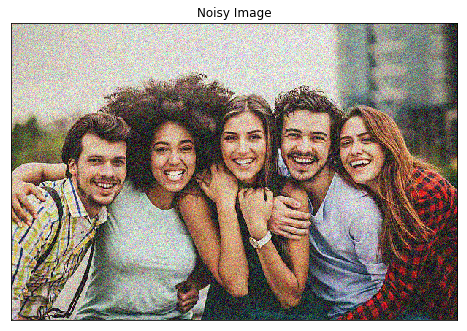

In [58]:
#load image
image = cv2.imread("images/2.jpg")


#convert in t0 RGB space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#making copy
image_with_noise = np.array(image)

# Gaussian distribution: a common model for noise 
noise_level = 26
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level


#adding noise in image
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])


#ploat image with noise
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

-------------

 In real world image with bad photo quality may missed by our detector so now i am applying same Opencv settings to this noisy image

Number of faces detected: 4


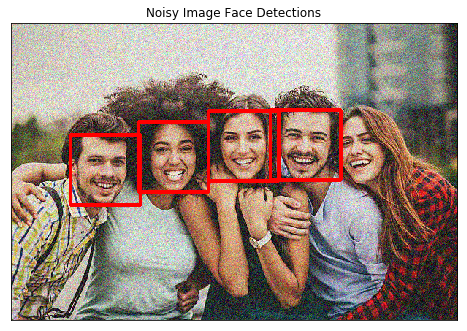

In [59]:
#  RGB  image to grayscale
gray_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_RGB2GRAY)

# haarcascade
face_cascade = cv2.CascadeClassifier('cv haarcascade/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_noise, 4, 6)


print('Number of faces detected:', len(faces))

# copy
image_with_detections = np.copy(image_with_noise)

# bounding box 
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image Face Detections')
ax1.imshow(image_with_detections)


De-noise the image with opencv's inbuit functionality called fastNlMeansDenoisingColored 

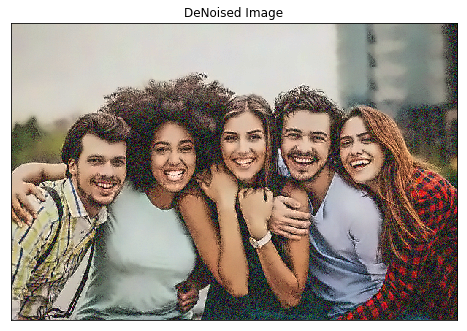

In [60]:
#de-noise image

denoise_image = cv2.fastNlMeansDenoisingColored(image_with_noise,None,10,10,7,21)


#  image with denoise applied
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('DeNoised Image')
ax1.imshow(denoise_image)

Number of faces detected: 5


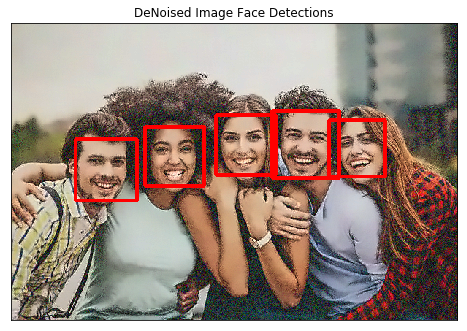

In [11]:
#face detector on the de-noised image 

#  RGB  image to grayscale
gray_noise_denoise = cv2.cvtColor(denoise_image, cv2.COLOR_RGB2GRAY)

# Detect the faces in image
faces_denoise = face_cascade.detectMultiScale(gray_noise_denoise, 1.3, 6)


print('Number of faces detected:', len(faces_denoise))

# Make a copy of the orginal image to draw face detections on
image_with_detections_denoise = np.copy(denoise_image)

# bounding box 
for (x,y,w,h) in faces_denoise:
    cv2.rectangle(image_with_detections_denoise, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('DeNoised Image Face Detections')
ax1.imshow(image_with_detections_denoise)

### Edge detection

Age detection is important concept in Computer vision

I am going to apply Canny edge detection of OpenCV

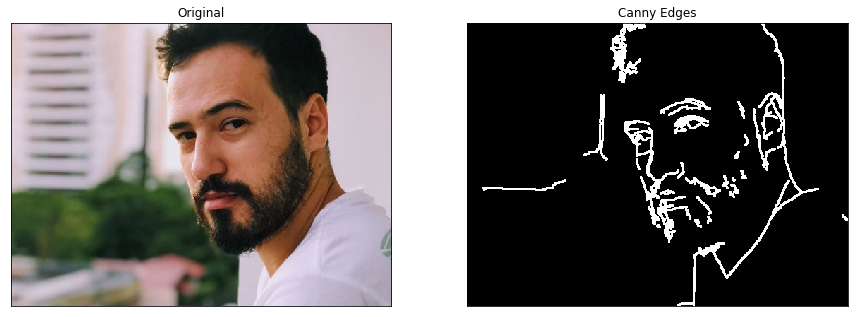

In [12]:
# image load

image = cv2.imread('images/man-17.jpg')

#convert BGR to RGB 
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#convert RGB to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

#canny edge detection
edges = cv2.Canny(gray,100,200)

#amplify the edges

edges = cv2.dilate(edges,None)


#image plotting
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')







Without bluring image i got some distortion in berads as well as on ear 
Let's try with image blur and than apply canny detection 

#### Image Blur and then Canny edge detection 

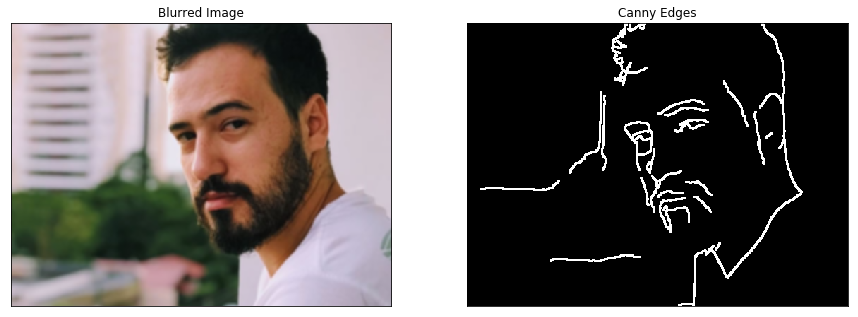

In [13]:
orig_img = np.copy(image)
kernel = np.ones((4,4),np.float32)/16
blur = cv2.filter2D(orig_img,-1,kernel)

# Canny edge detection on blurred image
edges_blur = cv2.Canny(blur,100,200)

# Dilate the image to amplify edges
edges_blur = cv2.dilate(edges_blur, None)

# Plot images
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Blurred Image')
ax1.imshow(blur)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges_blur, cmap='gray')

#### Blur to hide identity and use detector

Some times people don't want their faces to be reveal,Now i am adding blur on face and try face detection


face detected 1


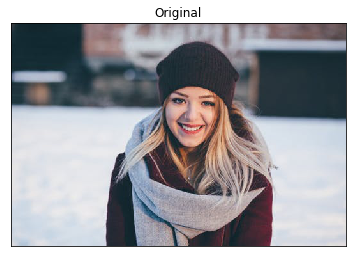

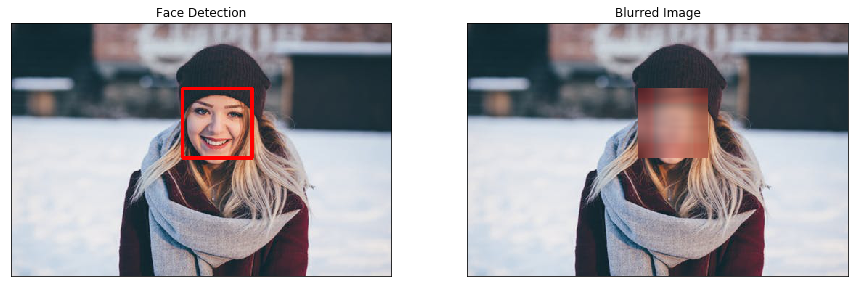

In [14]:

#image load
image = cv2.imread('images/girl.jpeg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original')
ax1.imshow(image)


# convert to RGB to  gray scale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

#Use opencv face detector
face_cascade = cv2.CascadeClassifier('cv haarcascade/haarcascade_frontalface_default.xml')

#face detection
faces = face_cascade.detectMultiScale(gray,4,5)

print ('face detected', len(faces))

#copy of image
image_dete = np.copy(image)

#bounding box around face
for(x,y,w,h) in faces:
    cv2.rectangle(image_dete, (x,y), (x+w,y+h) , (255,0,0), 3)
    face_box = image_dete[y:y+h, x:x+w]
    
# image with the detections
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Face Detection')
ax1.imshow(image_dete)

## Blur the bounding box around each detected face using an averaging filter and display the result
result_image = np.copy(image)
kernel_2 = np.ones((40,40),np.float32)/1600
blur_2 = cv2.filter2D(face_box,-1,kernel_2)
result_image[y:y+blur_2.shape[0], x:x+blur_2.shape[1]] = blur_2

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Blurred Image')
ax2.imshow(result_image)
    




###### WEB CAM BLUR

In [43]:

#apply cascade on web cam (0)for my laptop , (1)for external 
face_cascade = cv2.CascadeClassifier('cv haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('cv haarcascade/haarcascade_eye.xml')
cap = cv2.VideoCapture(0)#(0 for my inbuit)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    kernel_2 = np.ones((40,40),np.float32)/1220
    blur_2 = cv2.filter2D(roi_color,-1,kernel_2)
    img[y:y+blur_2.shape[0], x:x+blur_2.shape[1]] = blur_2
            
            

    cv2.imshow('Face and Eye detect',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break


cap.release()
cv2.destroyAllWindows()




## Implementing Facial Keypoint using CNN

I will use Kaggle DataSet (link). Data set contains Training and Testing data with 96*96 grayscale human faces photos.

In [61]:
import os
from keras.models import load_model
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle


def load_data(test=False):
    
    mytrain = 'training/training.csv'
    mytest = 'test/test.csv'
    data = mytest if test else mytrain
    df = read_csv(os.path.expanduser(data))  # load dataframes

    # Convert the image pixels to numpy arrays
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    df = df.dropna()  # drop all rows that have missing values 

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)
    X = X.reshape(-1, 96, 96, 1) # images as 96 x 96 x 1

    if not test:  # only FTRAIN has target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state= 5)  
        y = y.astype(np.float32)
    else:
        y = None

    return X, y


In [32]:

#load training and testing data
X_train, y_train = load_data()
print("X_train.shape = {}".format(X_train.shape))
print("y_train.shape = {}".format(y_train.shape))

# Load testing set
X_test, y_test = load_data(test=True)
print("X_test.shape = {}".format(X_test.shape))


X_train.shape = (2140, 96, 96, 1)
y_train.shape = (2140, 30)
X_test.shape = (1783, 96, 96, 1)


In [70]:
def plot_data(img, landmarks, axis):
    
    axis.imshow(np.squeeze(img), cmap='gray') 
    landmarks = landmarks * 48 + 48 
    axis.scatter(landmarks[0::2],
        landmarks[1::2],
        marker='o',
        c='c',
        s=40)
def plot_keypoints(img_path,
                  face_cascade=cv2.CascadeClassifier('cv haarcascade/haarcascade_frontalface_alt.xml'),
                  model_path='my_model.h5'):
    # function that plots keypoints on arbitrary image containing human
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.2, 5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    ax.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))

    if len(faces) == 0:
        plt.title('no faces detected')
    elif len(faces) > 1:
        plt.title('More than one faces detected')
        for (x,y,w,h) in faces:
            rectangle = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
            ax.imshow(cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB))
    elif len(faces) == 1:
        plt.title('Only one face detected')
        x,y,w,h = faces[0]
        bgr_crop = img[y:y+h, x:x+w]
        orig_shape_crop = bgr_crop.shape
        gray_crop = cv2.cvtColor(bgr_crop, cv2.COLOR_BGR2GRAY)
        resize_gray_crop = cv2.resize(gray_crop, (96, 96)) / 255.
        model = load_model(model_path)
        landmarks = np.squeeze(model.predict(
            np.expand_dims(np.expand_dims(resize_gray_crop, axis=-1), axis=0)))
        ax.scatter(((landmarks[0::2] * 48 + 48)*orig_shape_crop[0]/96)+x,
                   ((landmarks[1::2] * 48 + 48)*orig_shape_crop[1]/96)+y,
                   marker='o', c='c', s=40)
    plt.show()

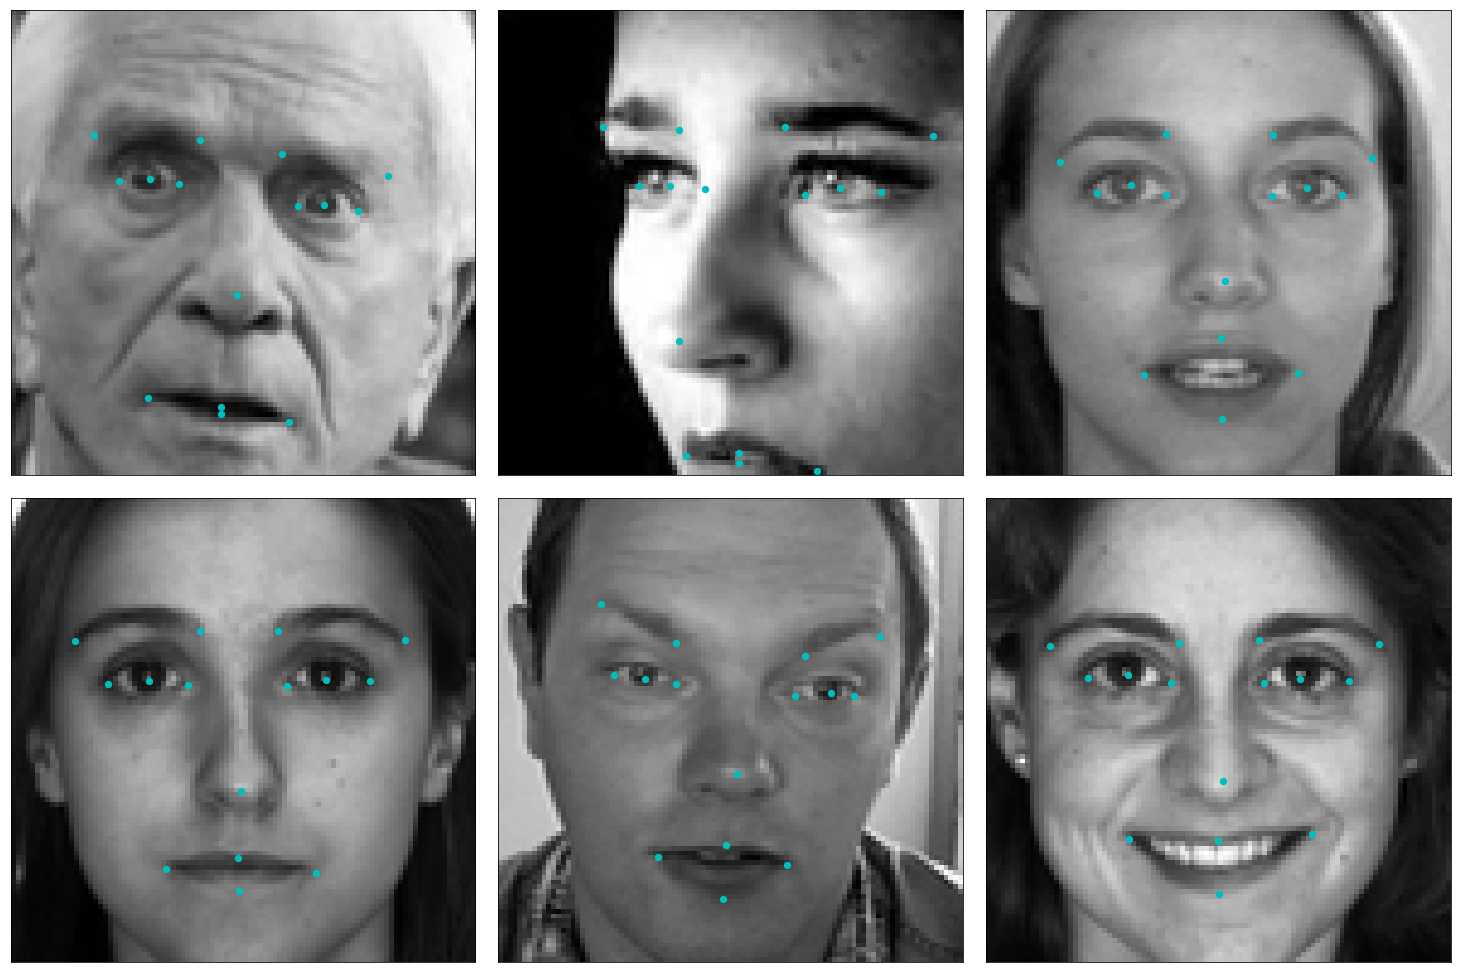

In [71]:
#  traininng set visulization.
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(6):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)






## NN architecture

Here my NN accept 96*96 gray scale images as input and will return 31 entries releted to 15 key points

In [200]:
#import from keras
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Dense, Flatten
from keras.layers.normalization import BatchNormalization


In [211]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96, 1)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(30))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 16)        160       
_________________________________________________________________
flatten_5 (Flatten)          (None, 141376)            0         
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 1131016   
_________________________________________________________________
dense_71 (Dense)             (None, 30)                270       
Total params: 1,131,446
Trainable params: 1,131,446
Non-trainable params: 0
_________________________________________________________________


### Compile and train the model

In [202]:
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

#Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [162]:
from keras.callbacks import ModelCheckpoint  

epochs = 25
batch_size = 128

checkpointer = ModelCheckpoint(filepath='saved_models/weights.benchmark.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(X_train, y_train, 
          validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

model.save('my_model1.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/25
1712/1712 [==============================] - 19s 11ms/step - loss: 1.3198 - acc: 0.0000e+00 - val_loss: 0.1506 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.15056, saving model to saved_models/weights.benchmark.hdf5
Epoch 2/25
1712/1712 [==============================] - 6s 4ms/step - loss: 0.1490 - acc: 0.0000e+00 - val_loss: 0.1458 - val_acc: 0.0000e+00

Epoch 00002: val_loss improved from 0.15056 to 0.14575, saving model to saved_models/weights.benchmark.hdf5
Epoch 3/25
1712/1712 [==============================] - 6s 3ms/step - loss: 0.1438 - acc: 0.0000e+00 - val_loss: 0.1402 - val_acc: 0.0000e+00

Epoch 00003: val_loss improved from 0.14575 to 0.14022, saving model to saved_models/weights.benchmark.hdf5
Epoch 4/25
1712/1712 [==============================] - 6s 3ms/step - loss: 0.1382 - acc: 0.0000e+00 - val_loss: 0.1344 - val_acc: 0.0000e+00

Epoch 00004: val_loss improved from 0.14022 to 0.13443, sav

In [203]:
model.load_weights('saved_models/weights.benchmark.hdf5')

In [208]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


1783/1783 [==============================] - 3s 2ms/step

acc: 0.56%


In [212]:
#CNN structure

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(30))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 94, 94, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 128)         73856     
__________

## Compile and train the model 



In [213]:

from keras.optimizers import Adam


#Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [130]:
from keras.callbacks import ModelCheckpoint  

epochs = 50
batch_size = 64

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(X_train, y_train, 
          validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

model.save('my_model.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 20s 12ms/step - loss: 0.0083 - acc: 0.6028 - val_loss: 0.0048 - val_acc: 0.6963

Epoch 00001: val_loss improved from inf to 0.00481, saving model to saved_models/weights.best.hdf5
Epoch 2/50
1712/1712 [==============================] - 18s 10ms/step - loss: 0.0066 - acc: 0.6408 - val_loss: 0.0047 - val_acc: 0.6963

Epoch 00002: val_loss improved from 0.00481 to 0.00466, saving model to saved_models/weights.best.hdf5
Epoch 3/50
1712/1712 [==============================] - 21s 12ms/step - loss: 0.0061 - acc: 0.6408 - val_loss: 0.0045 - val_acc: 0.6963

Epoch 00003: val_loss improved from 0.00466 to 0.00449, saving model to saved_models/weights.best.hdf5
Epoch 4/50
1712/1712 [==============================] - 23s 13ms/step - loss: 0.0058 - acc: 0.6530 - val_loss: 0.0047 - val_acc: 0.6963

Epoch 00004: val_loss did not improve
Epoch 5/50
1712/1712 [==============================] - 20s 12

1712/1712 [==============================] - 20s 12ms/step - loss: 0.0012 - acc: 0.7967 - val_loss: 0.0013 - val_acc: 0.7944

Epoch 00039: val_loss did not improve
Epoch 40/50
1712/1712 [==============================] - 20s 12ms/step - loss: 0.0012 - acc: 0.7886 - val_loss: 0.0011 - val_acc: 0.7780

Epoch 00040: val_loss did not improve
Epoch 41/50
1712/1712 [==============================] - 20s 12ms/step - loss: 0.0011 - acc: 0.8224 - val_loss: 0.0011 - val_acc: 0.7874

Epoch 00041: val_loss did not improve
Epoch 42/50
1712/1712 [==============================] - 20s 12ms/step - loss: 0.0011 - acc: 0.8107 - val_loss: 0.0011 - val_acc: 0.7944

Epoch 00042: val_loss did not improve
Epoch 43/50
1712/1712 [==============================] - 20s 12ms/step - loss: 0.0011 - acc: 0.8119 - val_loss: 0.0011 - val_acc: 0.7967

Epoch 00043: val_loss did not improve
Epoch 44/50
1712/1712 [==============================] - 20s 12ms/step - loss: 0.0010 - acc: 0.8137 - val_loss: 0.0011 - val_acc: 0.

In [214]:
model.load_weights('saved_models/weights.best.hdf5')

### Accuracy and Test prediction

In [146]:
Keypoint_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in X_train]

# report test accuracy
train_accuracy = 100*np.sum(np.array(Keypoint_predictions)==np.argmax(y_train, axis=1))/len(Keypoint_predictions)
print('Train accuracy: %.4f%%' % train_accuracy)


Train accuracy: 84.0654%


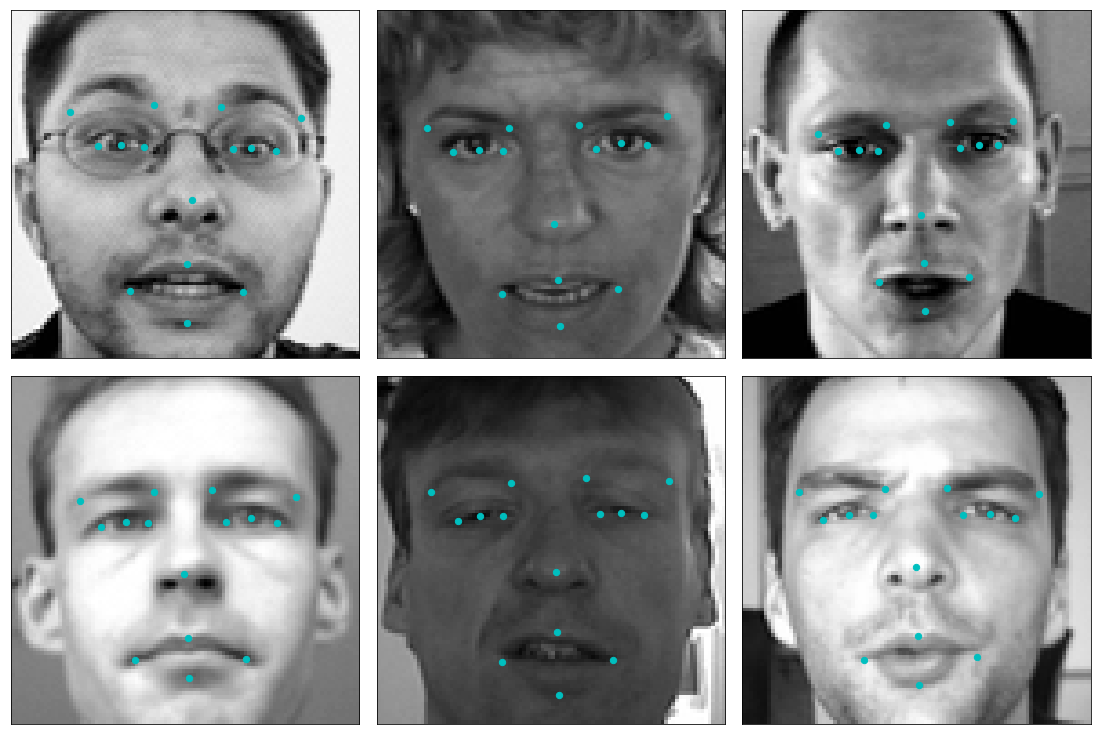

In [85]:
y_test = model.predict(X_test)
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(6):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)



## Testing Color Images

Gray images works pretty well for me, now i am passing color images.


In [217]:
# face detection with CNN
def plot_keypoints(img_path, face_cascade_path, model_path, scale=1.2, neighbors=5, key_size=10):
    
    face_cascade=cv2.CascadeClassifier(face_cascade_path) 
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scale, neighbors)
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(121, xticks=[], yticks=[])
    ax.set_title('Image with Facial Keypoints detected')

    # Print the number of faces detected in the image
    print('Faces detected:', len(faces))

    # Make a copy of the orginal image to draw face detections on
    image_with_detections = np.copy(img)

    # Get the bounding box for each detected face
    for (x,y,w,h) in faces:
        # Add a red bounding box to the detections image
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
        bgr_crop = image_with_detections[y:y+h, x:x+w] 
        orig_shape_crop = bgr_crop.shape
        gray_crop = cv2.cvtColor(bgr_crop, cv2.COLOR_BGR2GRAY)
        resize_gray_crop = cv2.resize(gray_crop, (96, 96)) / 255
        model = load_model(model_path)
        landmarks = np.squeeze(model.predict(
            np.expand_dims(np.expand_dims(resize_gray_crop, axis=-1), axis=0)))
        ax.scatter(((landmarks[0::2] * 48 + 48)*orig_shape_crop[0]/96)+x, 
                   ((landmarks[1::2] * 48 + 48)*orig_shape_crop[1]/96)+y, 
                   marker='o', c='c', s=key_size)
        
    ax.imshow(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))

Faces detected: 1
Faces detected: 3
Faces detected: 9


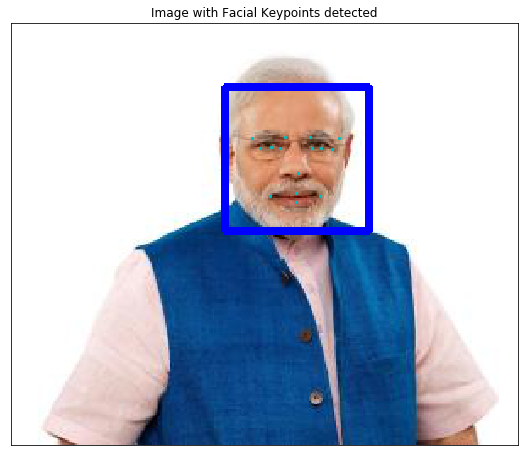

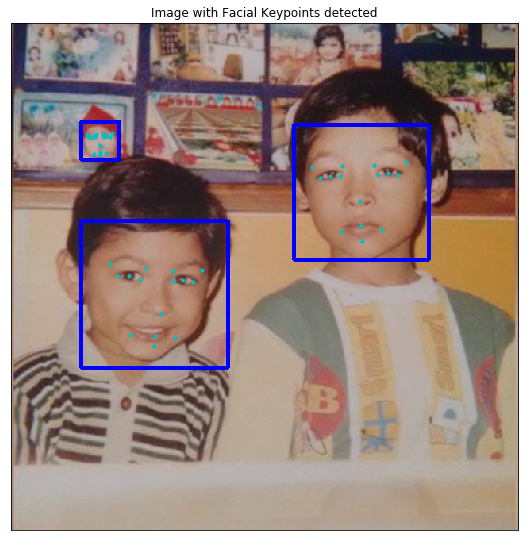

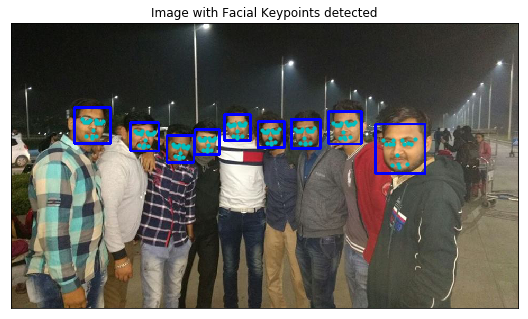

In [219]:
Test1 = plot_keypoints('images/namo.jpg',
                        'cv haarcascade/haarcascade_frontalface_default.xml',
                        'my_model.h5',scale=1.3, neighbors=5, key_size=5)
Test2 = plot_keypoints('images/kp.jpeg',
                        'cv haarcascade/haarcascade_frontalface_default.xml',
                        'my_model.h5')
Test2 = plot_keypoints('images/many.jpg',
                        'cv haarcascade/haarcascade_frontalface_default.xml',
                        'my_model.h5')

In [223]:
# WEB CAM -------
''''def plot_keypoints(face_cascade_path, model_path, scale=1.2, neighbors=5, key_size=10):
    
    face_cascade=cv2.CascadeClassifier(face_cascade_path) 
    cap = cv2.VideoCapture(0)
    
while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        resize_gray_crop = cv2.resize(roi_gray, (96, 96)) / 255
        model = load_model(model_path)
        landmarks = np.squeeze(model.predict(
            np.expand_dims(np.expand_dims(resize_gray_crop, axis=-1), axis=0)))
        ax.scatter(((landmarks[0::2] * 48 + 48)*orig_shape_crop[0]/96)+x, 
                   ((landmarks[1::2] * 48 + 48)*orig_shape_crop[1]/96)+y, 
                   marker='o', c='c', s=key_size)
        
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    cv2.imshow('Face and Eye detect',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break


cap.release()
cv2.destroyAllWindows()

'''

"'def plot_keypoints(face_cascade_path, model_path, scale=1.2, neighbors=5, key_size=10):\n    \n    face_cascade=cv2.CascadeClassifier(face_cascade_path) \n    cap = cv2.VideoCapture(0)\n    \nwhile 1:\n    ret, img = cap.read()\n    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n    faces = face_cascade.detectMultiScale(gray, 1.3, 5)\n\n    for (x,y,w,h) in faces:\n        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)\n        roi_gray = gray[y:y+h, x:x+w]\n        roi_color = img[y:y+h, x:x+w]\n        resize_gray_crop = cv2.resize(roi_gray, (96, 96)) / 255\n        model = load_model(model_path)\n        landmarks = np.squeeze(model.predict(\n            np.expand_dims(np.expand_dims(resize_gray_crop, axis=-1), axis=0)))\n        ax.scatter(((landmarks[0::2] * 48 + 48)*orig_shape_crop[0]/96)+x, \n                   ((landmarks[1::2] * 48 + 48)*orig_shape_crop[1]/96)+y, \n                   marker='o', c='c', s=key_size)\n        \n    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))